Graph loaded with 4039 nodes and 88234 edges.


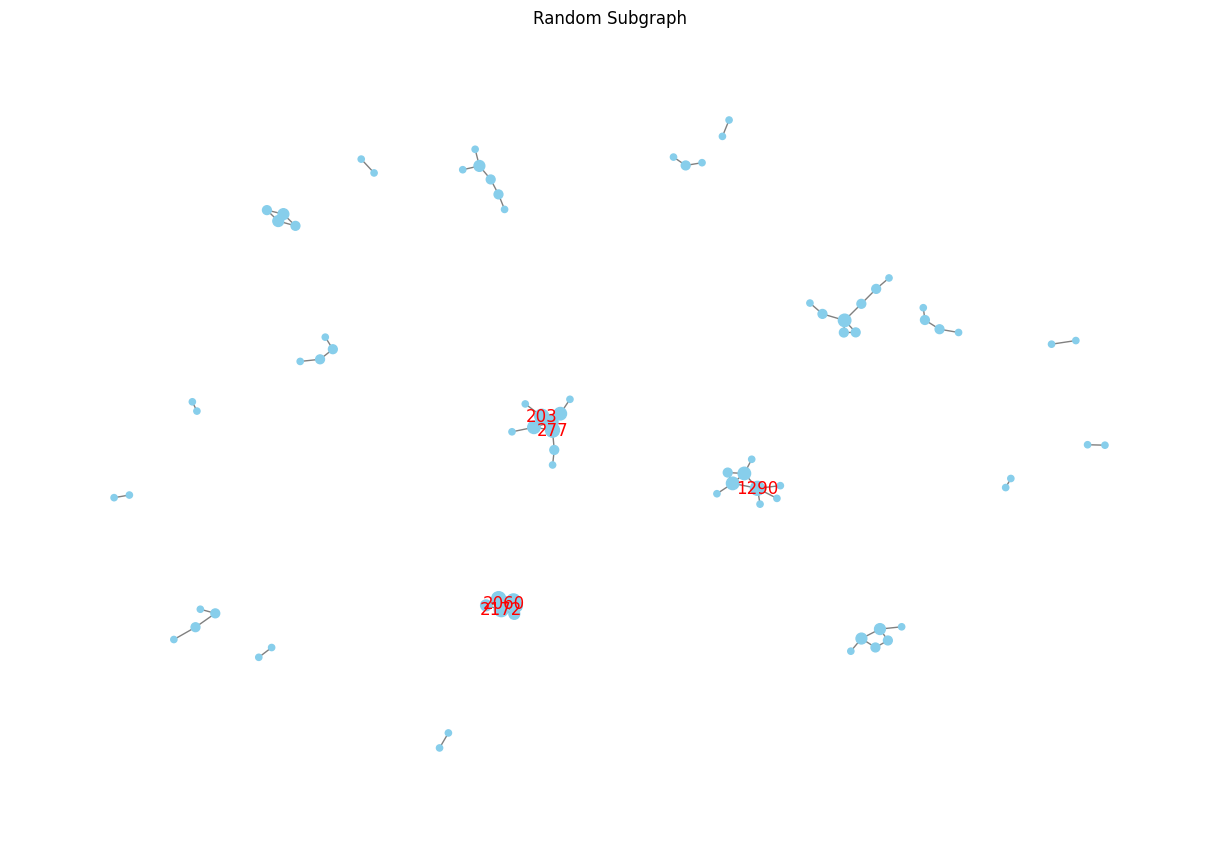

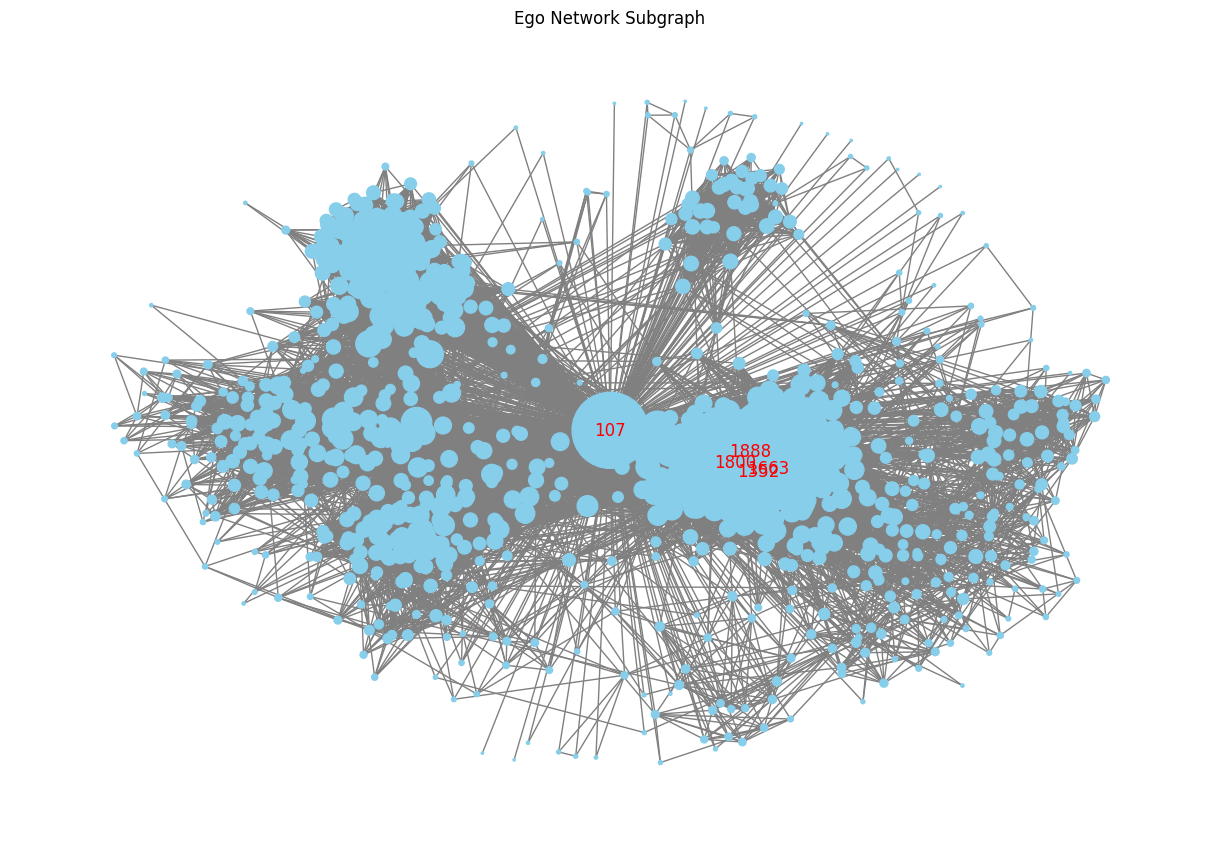

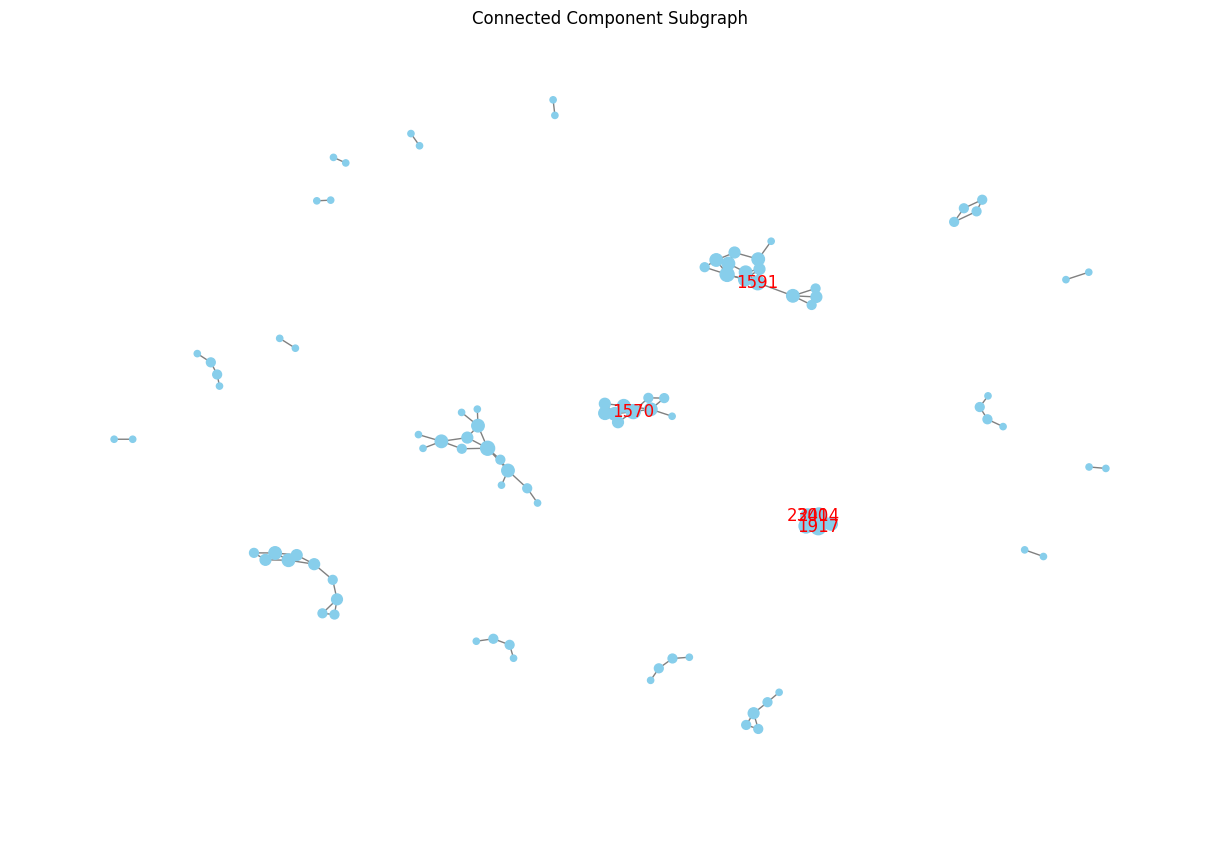

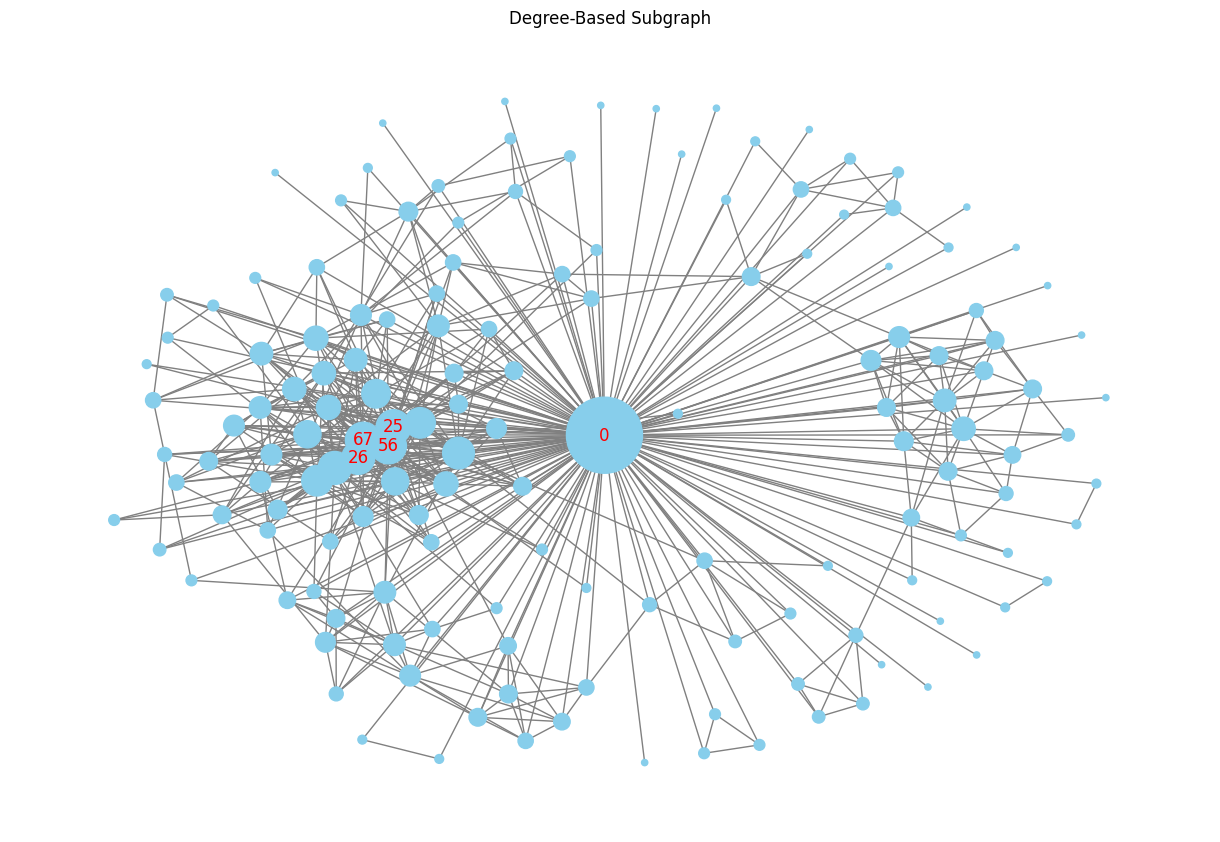

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Load the Facebook Social Circles Dataset
def load_facebook_graph(file_path):
    """
    Loads the Facebook Social Circles dataset into a NetworkX graph.
    :param file_path: Path to the Facebook edge list file.
    :return: A NetworkX Graph object.
    """
    try:
        # Load the edge list into a graph
        G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)
        print(f"Graph loaded with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
        return G
    except Exception as e:
        print(f"Error loading graph: {e}")
        return None

# Step 2: Create Subgraphs
def create_subgraph(graph, method="random", size=150):
    """
    Create a subgraph based on a specified method.
    :param graph: The NetworkX graph object.
    :param method: Method for subgraph creation ("random", "ego", "components", "degree").
    :param size: Approximate number of nodes in the subgraph.
    :return: Subgraph as a NetworkX Graph object.
    """
    if method == "random":
        # Randomly select nodes
        nodes = random.sample(list(graph.nodes()), size)
    elif method == "ego":
        # Select the largest ego network (centered on a high-degree node)
        central_node = max(nx.degree_centrality(graph), key=nx.degree_centrality(graph).get)
        nodes = list(nx.ego_graph(graph, central_node, radius=1).nodes())
    elif method == "components":
        # Get the largest connected component and sample nodes
        largest_cc = max(nx.connected_components(graph), key=len)
        nodes = random.sample(sorted(largest_cc), size)  # Convert to a sorted list before sampling
    elif method == "degree":
        # Select high-degree nodes and their neighbors
        high_degree_nodes = sorted(graph.degree, key=lambda x: x[1], reverse=True)[:int(size / 2)]
        nodes = set(node for node, _ in high_degree_nodes)
        for node, _ in high_degree_nodes:
            nodes.update(graph.neighbors(node))
        nodes = sorted(nodes)[:size]  # Ensure the list is sorted and sliced
    else:
        raise ValueError("Invalid method for subgraph creation!")
    
    return graph.subgraph(nodes)

# Step 3: Visualize Subgraph with Labels
def visualize_subgraph(graph, centrality, title, top_n=5):
    """
    Visualize a subgraph with labels for the most central nodes.
    :param graph: The NetworkX graph object (subgraph).
    :param centrality: Centrality measure dictionary for the subgraph.
    :param title: Title for the plot.
    :param top_n: Number of most central nodes to label.
    """
    # Identify the most central nodes
    sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    important_nodes = [node for node, _ in sorted_centrality[:top_n]]

    # Scale node sizes based on centrality
    sizes = [3000 * centrality[node] for node in graph.nodes()]
    pos = nx.spring_layout(graph)

    plt.figure(figsize=(12, 8))
    # Draw the subgraph
    nx.draw(
        graph,
        pos,
        with_labels=False,
        node_size=sizes,
        node_color="skyblue",
        edge_color="gray",
    )

    # Add labels for the most central nodes
    labels = {node: str(node) for node in important_nodes}
    nx.draw_networkx_labels(graph, pos, labels, font_size=12, font_color="red")

    plt.title(title)
    plt.show()

# Step 4: Main Execution
if __name__ == "__main__":
    # Path to the Facebook edge list file
    file_path = "facebook_combined.txt"  # Ensure the file is in the same directory or provide the correct path.

    # Load the graph
    facebook_graph = load_facebook_graph(file_path)

    if facebook_graph:
        # Create 4 subgraphs using different methods
        subgraphs = {
            "Random Subgraph": create_subgraph(facebook_graph, method="random", size=150),
            "Ego Network Subgraph": create_subgraph(facebook_graph, method="ego", size=150),
            "Connected Component Subgraph": create_subgraph(facebook_graph, method="components", size=150),
            "Degree-Based Subgraph": create_subgraph(facebook_graph, method="degree", size=150),
        }

        # Analyze and visualize each subgraph
        for name, subgraph in subgraphs.items():
            # Calculate degree centrality for the subgraph
            degree_centrality = nx.degree_centrality(subgraph)
            visualize_subgraph(
                subgraph,
                degree_centrality,
                title=name,
                top_n=5
            )
